# Analítica Avanzada de Datos.
---

# Métricas de clasificación
En el último notebook ***02.Clasificacion_Binario*** ajustamos un clasificador binario para predecir si los pacientes eran diabéticos o no. Utilizamos el *accuracy* como medida del rendimiento del modelo, pero este no lo es todo. En este notebook, veremos alternativas de métricas que pueden ser mucho más útiles en el aprendizaje automático.

## Métricas alternativas para clasificadores binarios
El *accuracy* parece una métrica buena para evaluar (y hasta cierto punto lo es), pero hay que tener cuidado con sacar demasiadas conclusiones del *accuracy* de un clasificador. Recuerda que es simplemente una medida de cuántos casos se predijeron correctamente. Supongamos que sólo el 3% de la población es diabética. Se podría crear un clasificador que siempre predijera 0, y tendría una precisión del 97%, ¡pero no sería muy útil para identificar a los pacientes con diabetes!

Afortunadamente, existen otras métricas que revelan algo más sobre el rendimiento de nuestro modelo. Scikit-Learn incluye la capacidad de crear un informe de clasificación que proporciona más información que la precisión bruta por sí sola.

Para empezar, ejecuta la siguiente celda para cargar nuestros datos y entrenar nuestro modelo como la última vez.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Cargar el dataset de entrenamiento
diabetes = pd.read_csv('diabetes.csv')

# Separar las caracteristicas y clases
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
label = 'Diabetic'
X, y = diabetes[features].values, diabetes[label].values


# Separamos el dataset 70%-30% en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

# Entrenamos el modelo
from sklearn.linear_model import LogisticRegression

# Fijar la tasa de regularización
reg = 0.01

# entrenar un modelo de regresión logística en el conjunto de entrenamiento
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)

predictions = model.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ' ,y_test)


print('Accuracy: ', accuracy_score(y_test, predictions))


Training cases: 10500
Test cases: 4500
Predicted labels:  [0 0 0 ... 0 1 0]
Actual labels:     [0 0 1 ... 1 1 1]
Accuracy:  0.7893333333333333


Uno de los lugares más sencillos para empezar es un informe de clasificación. Ejecuta la siguiente celda para ver una serie de formas alternativas de evaluar nuestro modelo

In [2]:
from sklearn. metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      2986
           1       0.72      0.60      0.66      1514

    accuracy                           0.79      4500
   macro avg       0.77      0.74      0.75      4500
weighted avg       0.78      0.79      0.78      4500



El informe de clasificación incluye las siguientes métricas para cada clase (0 y 1)

> nota que la fila del encabezado puede no coincidir con los valores!

* *Precision*: ¿Qué proporción de las predicciones realizadas por el modelo para esta clase fueron correctas?
* *Recall*: De todos los casos de esta clase en el conjunto de datos de prueba, ¿cuántos identificó el modelo?
* *F1-Score*: Una métrica media que tiene en cuenta tanto la precisión como la recuperación.
* *Support*: ¿Cuántos casos de esta clase hay en el conjunto de datos de prueba?

El informe de clasificación también incluye promedios para estas métricas, incluida una media ponderada que tiene en cuenta el desequilibrio en el número de casos de cada clase.

Dado que se trata de un problema de *clasificación binaria*, la clase ***1*** se considera *positiva* y su precisión y recuperación son especialmente interesantes, ya que responden a las preguntas:

- De todos los pacientes que el modelo predijo que eran diabéticos, ¿cuántos son realmente diabéticos?
- De todos los pacientes que son realmente diabéticos, ¿cuántos identificó el modelo?

Puede obtener estos valores por sí mismos utilizando las métricas **precision_score** y **recall_score** en scikit-learn (que por defecto asumen un modelo de clasificación binario).

In [3]:
from sklearn.metrics import precision_score, recall_score

print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))

Overall Precision: 0.7242472266244057
Overall Recall: 0.6036988110964333


Las métricas de precisión y recall se derivan de cuatro posibles resultados de predicción:

* *True Positives*: La clase predicha y la clase real son ambas 1.
* *False Positives*: La clase predicha es 1, pero la clase real es 0.
* *False Negatives*: La clase predicha es 0, pero la clase real es 1.
* *True Negatives*: La clase predicha y la clase real son ambas 0.

Estas métricas se tabulan generalmente para el conjunto de pruebas y se muestran juntas como una *matriz de confusión*, que tiene la siguiente forma:

<table style="border: 1px solid black;">
    <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;color: black;" bgcolor="lightgray">TN</td><td style="border: 1px solid black;color: black;" bgcolor="white">FP</td>
    </tr>
    <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;color: black;" bgcolor="white">FN</td><td style="border: 1px solid black;color: black;" bgcolor="lightgray">TP</td>
    </tr>
</table>

Observa que las predicciones correctas (*verdaderas*) forman una línea diagonal desde arriba a la izquierda hasta abajo a la derecha: estas cifras deberían ser significativamente más altas que las predicciones *falsas* si el modelo es bueno.

En Python, puede utilizar la función **sklearn.metrics.confusion_matrix** para encontrar estos valores para un clasificador entrenado:

In [4]:
from sklearn.metrics import confusion_matrix

# Imprime la matriz de confusión
cm = confusion_matrix(y_test, predictions)
print (cm)

[[2638  348]
 [ 600  914]]


Hasta ahora, hemos considerado las predicciones del modelo como clases de 1 o 0 clases. Peor los algoritmos estadísticos de aprendizaje automático, como la regresión logística, se basan en la probabilidad; por tanto, lo que realmente predice un clasificador binario es la probabilidad de que la clase sea verdadera (**P(y)**)  y la probabilidad de que la clase sea falsa (1 - **P(y)**). Se utiliza un valor umbral de 0.5 para decidir si la clase predicha es un 1 (*P(y) > 0.5*)  o un (*P(y) <= 0.5*). Puedes utilizar el método **predict_proba** para ver los pares de probabilidades para cada caso:

In [5]:
y_scores = model.predict_proba(X_test)
print(y_scores)

[[0.81651727 0.18348273]
 [0.96298333 0.03701667]
 [0.80862083 0.19137917]
 ...
 [0.60688422 0.39311578]
 [0.10672996 0.89327004]
 [0.63865894 0.36134106]]


La decisión de puntuar una predicción como 1 o como 0 depende del umbral con el que se comparan las probabilidades predichas. Si cambiáramos el umbral, las predicciones se verían afectadas y, por tanto, cambiarían las métricas de la matriz de confusión. 

Una forma habitual de evaluar un clasificador es examinar la tasa de *true positive* (que es otro nombre para recall) y la tasa de *false positive* para un rango de posibles umbrales. A continuación, estas tasas se representan gráficamente frente a todos los umbrales posibles para formar una gráfica conocida como *received operator characteristic (ROC) chart*, como éste:

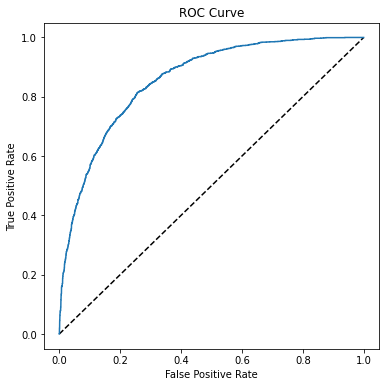

In [6]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# dibujar la curva ROC
fig = plt.figure(figsize=(6, 6))
# Trazar la línea diagonal del 50%
plt.plot([0, 1], [0, 1], 'k--')
# Representar gráficamente el FPR y el TPR obtenidos por nuestro modelo
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

El *ROC chart* muestra la curva de las tasas de verdaderos y falsos positivos para diferentes valores de umbral entre 0 y 1. Un clasificador perfecto tendría una curva que va recta hacia arriba por el lado izquierdo y recta por la parte superior. La línea diagonal que atraviesa el gráfico representa la probabilidad de predecir correctamente con una predicción aleatoria del 50/50, por lo que es obvio que se desea que la curva sea más alta que eso (¡o el modelo no será mejor que simplemente adivinar!).

El área bajo la curva (AUC) es un valor entre 0 y 1 que cuantifica el rendimiento global del modelo. Cuanto más se acerque a 1 este valor, mejor será el modelo. Una vez más, scikit-Learn incluye una función para calcular esta métrica.

In [7]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.8568482508863468


### Realizar el preprocesamiento en un *pipeline*

En este caso, la curva ROC y su AUC indican que el modelo funciona mejor que una suposición aleatoria.

En la práctica, es habitual preprocesar los datos para facilitar al algoritmo el ajuste de un modelo. Hay una gran variedad de transformaciones de preprocesamiento que se pueden realizar para preparar los datos para el modelado, pero nos limitaremos a algunas técnicas comunes:

- Escalado de características numéricas para que estén en la misma escala. Esto evita que las características con valores grandes produzcan coeficientes que afecten desproporcionadamente a las predicciones.
- Codificación de variables categóricas. Por ejemplo, utilizando una técnica de *one hot encoding* se pueden crear características binarias (verdadero/falso) individuales para cada posible valor de categoría.

Para aplicar estas transformaciones de preprocesamiento, utilizaremos una función de Scikit-Learn denominada *pipelines*. Estas nos permiten definir un conjunto de pasos de preprocesamiento que terminan con un algoritmo. A continuación, puedse ajustar toda la tubería a los datos, de modo que el modelo encapsula todos los pasos de preprocesamiento, así como el algoritmo de regresión. 

Esto es útil, porque cuando queremos utilizar el modelo para predecir valores a partir de nuevos datos, necesitamos aplicar las mismas transformaciones (basadas en las mismas distribuciones estadísticas y codificaciones de categorías utilizadas con los datos de entrenamiento).

>**Nota**: El término *pipeline* se utiliza mucho en el aprendizaje automático, ¡a menudo para significar cosas muy diferentes! En este contexto, lo estamos utilizando para referirnos a los objetos pipeline en Scikit-Learn, pero puede que lo veas utilizado en otros lugares para significar otra cosa.


In [8]:
# Entrenamos el modelo
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np

# Definir preprocesamiento para columnas numéricas (normalizarlas para que estén en la misma escala)
numeric_features = [0,1,2,3,4,5,6]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Definir el preprocesamiento para características categóricas (codificar la columna Age)
categorical_features = [7]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combinar los pasos del preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Creación de un pipeline de preprocesamiento y formación
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', LogisticRegression(C=1/reg, solver="liblinear"))])


# ajustar el pipeline para entrenar un modelo de regresión logística en el conjunto de entrenamiento
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor',
                 LogisticRegression(C=100.0, solver='liblinear'))])


El proceso *pipeline encapsulates*  hace los pasos de preprocesamiento y entrenamiento del modelo.

Utilicemos el modelo entrenado por este proceso para predecir las clases de nuestro conjunto de pruebas y comparemos las métricas de rendimiento con el modelo básico que creamos anteriormente.

Confusion Matrix:
 [[2667  319]
 [ 406 1108]] 

Accuracy: 0.8388888888888889
Overall Precision: 0.7764540995094604
Overall Recall: 0.7318361955085865
AUC: 0.9202444963329531


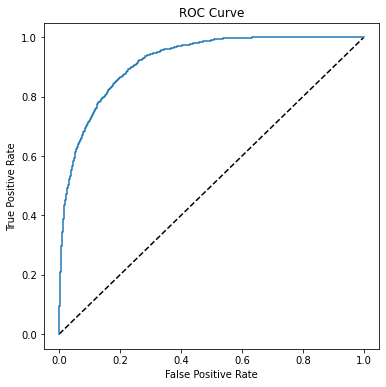

In [9]:
# Obtener predicciones a partir de datos de prueba
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)

# Obtener métricas de evaluación
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

# calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# trazar la curva ROC
fig = plt.figure(figsize=(6, 6))
# Trazar la línea diagonal del 50%
plt.plot([0, 1], [0, 1], 'k--')
# Representar gráficamente el FPR y el TPR obtenidos por nuestro modelo
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Los resultados parecen un poco mejores, así que está claro que el preprocesamiento de los datos ha marcado la diferencia.

### Probar otro algoritmo
Ahora vamos a probar un algoritmo diferente. Antes utilizamos un algoritmo de regresión logística, que es un algoritmo lineal. Hay muchos tipos de algoritmos de clasificación que podríamos probar, entre ellos

- **Support Vector Machine algorithms**: Algoritmos que definen un *hiperplano* que separa las clases.
- **Tree-based algorithms**:  Algoritmos que construyen un árbol de decisión para llegar a una predicción.
- **Ensemble algorithms**: Algoritmos que combinan los resultados de varios algoritmos base para mejorar la generalizabilidad.

En esta ocasión, utilizaremos los mismos pasos de preprocesamiento que antes, pero entrenaremos el modelo utilizando un algoritmo *ensemble* llamado *Random Forest* que combina las salidas de múltiples árboles de decisión aleatorios (para más detalles, consulte la documentación de Scikit-Learn) https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees.

In [10]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', RandomForestClassifier(n_estimators=100))])

# ajustar el pipeline para entrenar un modelo de bosque aleatorio en el conjunto de entrenamiento
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor', RandomForestClassifier())])


Veamos los parámetros de rendimiento del nuevo modelo.

Confusion Matrix:
 [[2860  126]
 [ 176 1338]] 

Accuracy: 0.9328888888888889
Overall Precision: 0.9139344262295082
Overall Recall: 0.8837516512549538

AUC: 0.9820263165578511


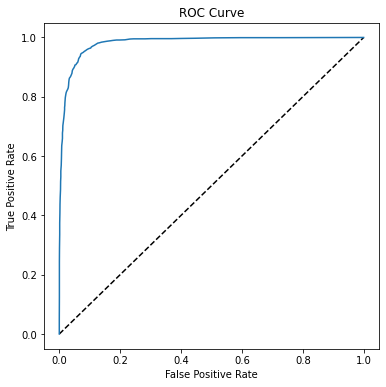

In [11]:
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# trazar la curva ROC
fig = plt.figure(figsize=(6, 6))
# Trazar la línea diagonal del 50%
plt.plot([0, 1], [0, 1], 'k--')
# Representar gráficamente el FPR y el TPR obtenidos por nuestro modelo
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Utilizar el modelo para inferencias
Ahora que tenemos un modelo entrenado razonablemente útil, podemos guardarlo para utilizarlo más adelante para predecir clases para nuevos datos:

In [12]:
import joblib

# Guardar el modelo como archivo pickle
filename = 'diabetes_model.pkl'
joblib.dump(model, filename)

['diabetes_model.pkl']

Cuando tenemos algunas observaciones nuevas cuya clase es desconocida, podemos cargar el modelo y utilizarlo para predecir los valores de la clase

In [13]:
# Cargar el modelo desde el archivo
model = joblib.load(filename)

# predecir en una nueva muestra
# El modelo acepta una matriz de matrices de características (para que pueda predecir las clases de múltiples pacientes en una sola llamada)
# Crearemos un array con un único array de características, representando a un paciente
X_new = np.array([[2,180,74,24,21,23.9091702,1.488172308,22]])
print ('New sample: {}'.format(list(X_new[0])))

# Obtener una predicción
pred = model.predict(X_new)

# El modelo devuelve una matriz de predicciones - una para cada conjunto de características presentadas
# En nuestro caso, sólo hemos enviado un paciente, por lo que nuestra predicción es la primera de la matriz resultante.
print('Predicted class is {}'.format(pred[0]))

New sample: [2.0, 180.0, 74.0, 24.0, 21.0, 23.9091702, 1.488172308, 22.0]
Predicted class is 1
